# Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

#Condicion de estabiliadad
-----------------
Observamos que sucede en la convección lineal al variar el número de veces en que se va a discretizar la variable $x$ (y por lo tanto la derivada).

In [0]:
import numpy as np #importa numpy.
import matplotlib.pyplot as plt #importa la herramienta para graficar
%matplotlib inline
#hace que las gráficas aparescan en la siguiente linea

def pulso(x0, x1, x): #define la función pulso
  if x < x0 or x > x1:
    return(0.0)
  else:
    return(1.0)

def conveccionlineal(nx):
  L = 2 #el tamaño de nuestro intervalo en x
  dx = L/(nx-1) #la distancia que hay entre cada punto discretizado x (dx)
  T = 1.0 #intervalo total de tiempo
  nt = 51 #número de veces que se discretiza la variable tiempo
  dt = T/(nt-1) #tamaño de los intervalos de tiempo (dt)
  c = 1.0 #velocidad de la onda (e.d.)
  #CLF = c*dt/dx #error
  #print("C =", CLF)

  u = np.linspace(0, L, nx) #np.linspace genera un vector con nx entradas que contiene números igualmente espaciados en un intervalo (0,L)
  x = np.linspace(0, L, nx) #generamos dos porque uno va a entrar a la funcion pulso

  for i in range(len(x)):
    u[i] = pulso(0.5, 1.0, x[i])

  un = np.zeros(nx) #crea un vector temporal de tamaño nx con entradas ceros
  for n in range(nt): #genera el loop nt veces
    un = u.copy() #copia los elementos de u al vector temporal un
    for i in range(1,nx): #el loop realiza las operaciones para calcular el u^{n+1}_{i}, pero comienza con el elemento u[1] y no u[o] (se salta el primer elemento)
      u[i] = un[i]- c*dt*(un[i]-un[i-1])/dx

  plt.plot(x,u)

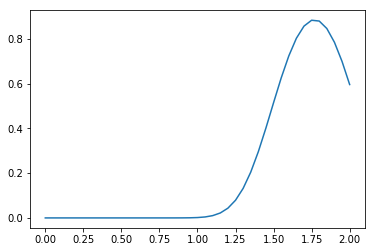

In [0]:
conveccionlineal(41)

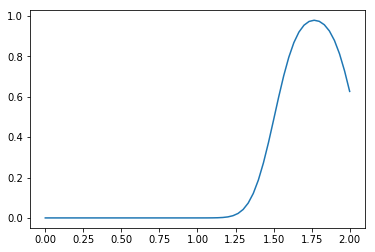

In [0]:
conveccionlineal(61)

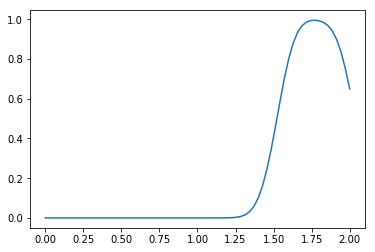

In [0]:
conveccionlineal(71)

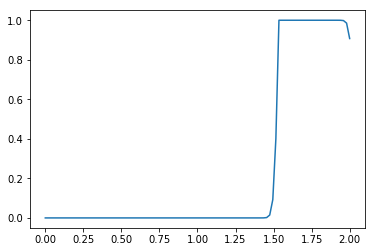

In [0]:
conveccionlineal(100)

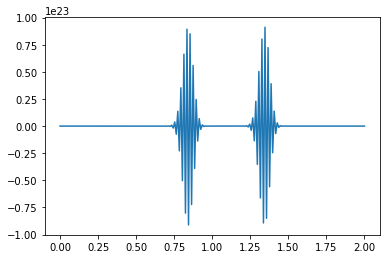

In [0]:
conveccionlineal(200)

Al aumentar nx, la derivada se vuelve más precisa, y la onda toma una forma mas cuadrada. Lo que salió mal en el ultimo caso, es que en tales periodos $\Delta t$ la onda se ha desplazado una distancia mayor que $dx$ (el cual depende de nx). Podemos aumentar la estabilidad si el paso $\Delta t$ es calculado dependiendo del tamaño de paso $dx$
\begin{equation}
\sigma = \frac{c \Delta t}{\Delta x} \leq \sigma_{\text{max}},
\end{equation}
siendo $c$ la velocidad de la onda, $\sigma$ es concido como número de Courant (número CFL), $\sigma_{\text{max}}$ asegurará estabilidad depende de nx.

Realizamos ahora la conveccion lineal utilizando el número CFL, de manera, que el tamaño de los pasos $\Delta t$ sean adecuados al $dx$.

In [0]:
def conveccionlinealCFL(nx):
  L = 2 #el tamaño de nuestro intervalo en x
  dx = L/(nx-1) #la distancia que hay entre cada punto discretizado x (dx)
  T = 1.0 #intervalo total de tiempo
  nt = 51 #número de veces que se discretiza la variable tiempo
  c = 1.0 #velocidad de la onda (e.d.)
  sigmamax = 0.5
  dt = dx*sigmamax/c
  

  u = np.linspace(0, L, nx) #np.linspace genera un vector con nx entradas que contiene números igualmente espaciados en un intervalo (0,L)
  x = np.linspace(0, L, nx) #generamos dos porque uno va a entrar a la funcion pulso

  for i in range(len(x)):
    u[i] = pulso(0.5, 1.0, x[i])

  un = np.zeros(nx) #crea un vector temporal de tamaño nx con entradas ceros
  for n in range(nt): #genera el loop nt veces
    un = u.copy() #copia los elementos de u al vector temporal un
    for i in range(1,nx): #el loop realiza las operaciones para calcular el u^{n+1}_{i}, pero comienza con el elemento u[1] y no u[o] (se salta el primer elemento)
      u[i] = un[i]- c*dt*(un[i]-un[i-1])/dx

  plt.plot(x,u)

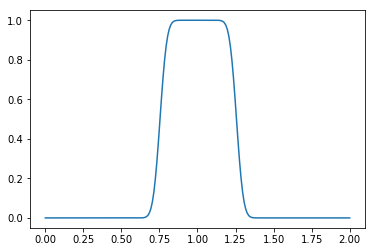

In [0]:
conveccionlinealCFL(200)